In [26]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Pandas profile shows that the data is composed of 17 numerical and 1 categorical features. There is 0.2% of missing cells from the total number of cells, in CREDIT_LIMIT and MINIMUM_PAYMENTS. High coreelations where observed between many features. For example :

BALANCE is highly correlated with BALANCE_FREQUENCY, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX and MINIMUM_PAYMENTS.
PURCHASES is highly correlated with ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY.

The ID of the customer is not an relevant feature in our case. Hence, it will be deleted.

In [4]:
data=data.drop("CUST_ID", axis=1)

In [5]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The missing value in CREDIT_LIMIT will be replaced by the mean.

In [6]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

The missing value in MINIMUM_PAYMENTS will be replaced by the median.

In [7]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [26]:
data.isnull().sum().sum()

0

We will try to do the cusmtomers segmentation using the hierarchical agglomerative clustering. We choose to obtain 4 clusters. We will use 'ward' linkage because it minimizes the variance of the clusters being merged.

In [8]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(data)  

In [9]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,3
1,1
2,1
3,0
4,3
...,...
8945,3
8946,3
8947,3
8948,3


In [10]:
agglomerative.value_counts()

3    4747
0    2809
1    1371
2      23
dtype: int64

We obtained 4 clusters (0,1,2,3). The biggest cluster is number 3. The smallest cluster is number 2. Let's try to build a dendrogram which explains how the segmentation was done.

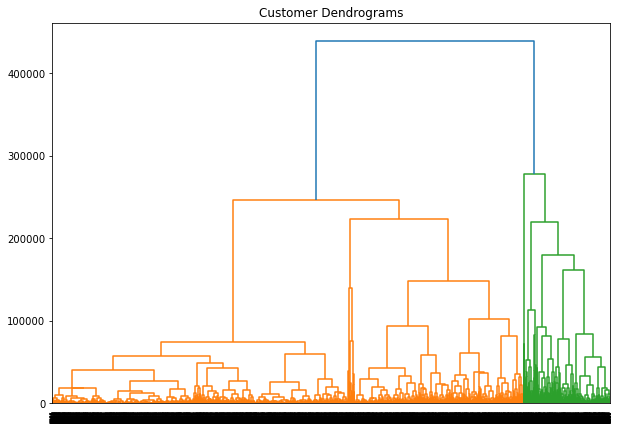

In [28]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward"))

Now, let's try to do kmeans clustering. We will start by 4 as a number of clusters.

In [13]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 4 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [14]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [15]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[8.54265776e+02 8.53588134e-01 6.04853925e+02 3.13230623e+02
  2.91923747e+02 4.95644191e+02 4.67278749e-01 1.53989621e-01
  3.52071461e-01 1.06990637e-01 2.25747764e+00 1.06637373e+01
  2.73946470e+03 9.99211831e+02 5.06543248e+02 1.57095914e-01
  1.14304656e+01]
 [3.34172394e+03 9.40050000e-01 1.58253843e+03 9.98090948e+02
  5.84761637e+02 2.11821578e+03 5.41757092e-01 3.21778414e-01
  3.84352010e-01 2.10793817e-01 5.73848179e+00 2.20996051e+01
  9.04282780e+03 2.89268089e+03 1.18166339e+03 1.37453724e-01
  1.17367266e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [4.79253297e+03 9.10564109e-01 1.07865302e+04 7.66993465e+03
  3.11676612e+03 5.17100806e+03 7.50458054e-01 6.02245070e-01
  6.01053744e-01 2.27004240e-01 9.20930233e+00 8.58914729e+01
  1.24771318e+04

In [16]:
data['label'] = labels

In [17]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


This segmentation is based on the behaviour credit cardholders. We will represent customers behaviour in a plot by balance and cash advance into 4 clusters:
- "BALANCE": Balance amount left in their account to make purchases 
- "CASH_ADVANCE": Cash in advance given by the user

- Deal chasers with medium to high balance and high cash advance (cluster 2:green)
- Financially stressed : low balance and low cash advance(cluster 1:yellow)
- prosperous and content : medium to high balance and medium cash advance (cluster 0:magenta) 
- Self aware avoiders : careful customers with medium to high balance and low cash advance (cluster 3:cyan)


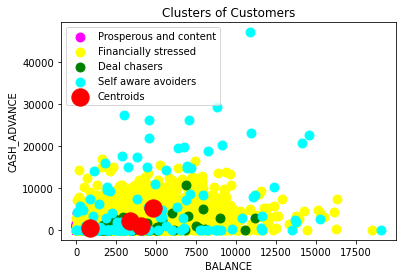

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data["BALANCE"][data.label == 0],          
            data["CASH_ADVANCE"][data.label == 0],s=80,c='magenta',label='Prosperous and content')
plt.scatter(data["BALANCE"][data.label == 1],
           data["CASH_ADVANCE"][data.label == 1],s=80,c='yellow',label='Financially stressed')
plt.scatter(data["BALANCE"][data.label == 2],
           data["CASH_ADVANCE"][data.label == 2],s=80,c='green',label='Deal chasers')
plt.scatter(data["BALANCE"][data.label == 3], 
           data["CASH_ADVANCE"][data.label == 3],s=80,c='cyan',label='Self aware avoiders')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel("BALANCE")
plt.ylabel("CASH_ADVANCE")
plt.legend()
plt.show()

Let's try to find the optimum number of clusters K using the elbow method.

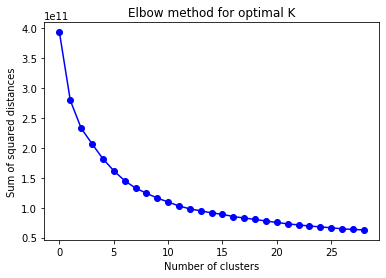

In [20]:
from sklearn.cluster import KMeans
sum_of_squared_distances=[] 
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data )
    sum_of_squared_distances.append( kmeans.inertia_ )
    
plt.plot( sum_of_squared_distances, 'bo-', label="sum_of_squared_distances")
plt.title('Elbow method for optimal K')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.show()

The elbow method gives 8 as the optimal number of clusters which is relative to the minimum Sum of squared distances.

In [21]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans1=KMeans(n_clusters=8, random_state=0)  #Cluster our data by choosing 4 as number of clusters
kmeans1.fit(data)

KMeans(random_state=0)

In [22]:
labels1=pd.DataFrame(kmeans1.labels_)
labels1

,0
0,1
1,3
2,0
3,0
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [23]:
kmeans1.predict(data)
print(kmeans1.cluster_centers_)

[[8.90765514e+02 8.71777361e-01 1.21759889e+03 7.15570756e+02
  5.02248083e+02 2.28682178e+02 6.19964779e-01 3.32351727e-01
  4.28081017e-01 4.95011161e-02 9.38221709e-01 1.89884527e+01
  6.95088705e+03 1.44127981e+03 3.45358964e+02 2.36809726e-01
  1.18065820e+01 4.54387991e-01]
 [7.83439077e+02 8.50472491e-01 4.97020399e+02 2.40026599e+02
  2.57296115e+02 4.43654914e+02 4.51285368e-01 1.29143373e-01
  3.47484541e-01 1.07579920e-01 2.19377030e+00 9.35983184e+00
  2.11923976e+03 8.56659410e+02 5.21236715e+02 1.43562421e-01
  1.13649914e+01 3.05751959e-03]
 [4.43823760e+03 9.85258000e-01 1.19472838e+03 1.72967838e+02
  1.02176054e+03 1.02424561e+03 5.12899216e-01 5.03684865e-02
  4.83005730e-01 8.68140541e-02 2.97297297e+00 2.30270270e+01
  4.65270270e+03 1.53481347e+03 2.77112739e+04 0.00000000e+00
  1.19189189e+01 2.00000000e+00]
 [4.05937632e+03 9.58427871e-01 5.04101644e+02 2.79196942e+02
  2.24938087e+02 3.53910520e+03 3.10925579e-01 1.33523740e-01
  2.12699525e-01 3.68398057e-01 1

In [27]:
data['label1'] = labels1

In [28]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label1
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


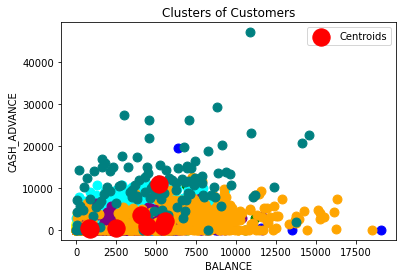

In [29]:
plt.scatter(data["BALANCE"][data.label1 == 0],          
            data["CASH_ADVANCE"][data.label1 == 0],s=80,c='magenta')
plt.scatter(data["BALANCE"][data.label1 == 1],
           data["CASH_ADVANCE"][data.label1 == 1],s=80,c='yellow')
plt.scatter(data["BALANCE"][data.label1 == 2],
           data["CASH_ADVANCE"][data.label1 == 2],s=80,c='green')
plt.scatter(data["BALANCE"][data.label1 == 3], 
           data["CASH_ADVANCE"][data.label1 == 3],s=80,c='cyan')
plt.scatter(data["BALANCE"][data.label1 == 4],
           data["CASH_ADVANCE"][data.label1 == 4],s=80,c='blue')
plt.scatter(data["BALANCE"][data.label1 == 5],
           data["CASH_ADVANCE"][data.label1 == 5],s=80,c='purple')
plt.scatter(data["BALANCE"][data.label1 == 6], 
           data["CASH_ADVANCE"][data.label1 == 6],s=80,c='orange')
plt.scatter(data["BALANCE"][data.label1 == 7], 
           data["CASH_ADVANCE"][data.label1 == 7],s=80,c='teal')

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 5], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel("BALANCE")
plt.ylabel("CASH_ADVANCE")
plt.legend()
plt.show()

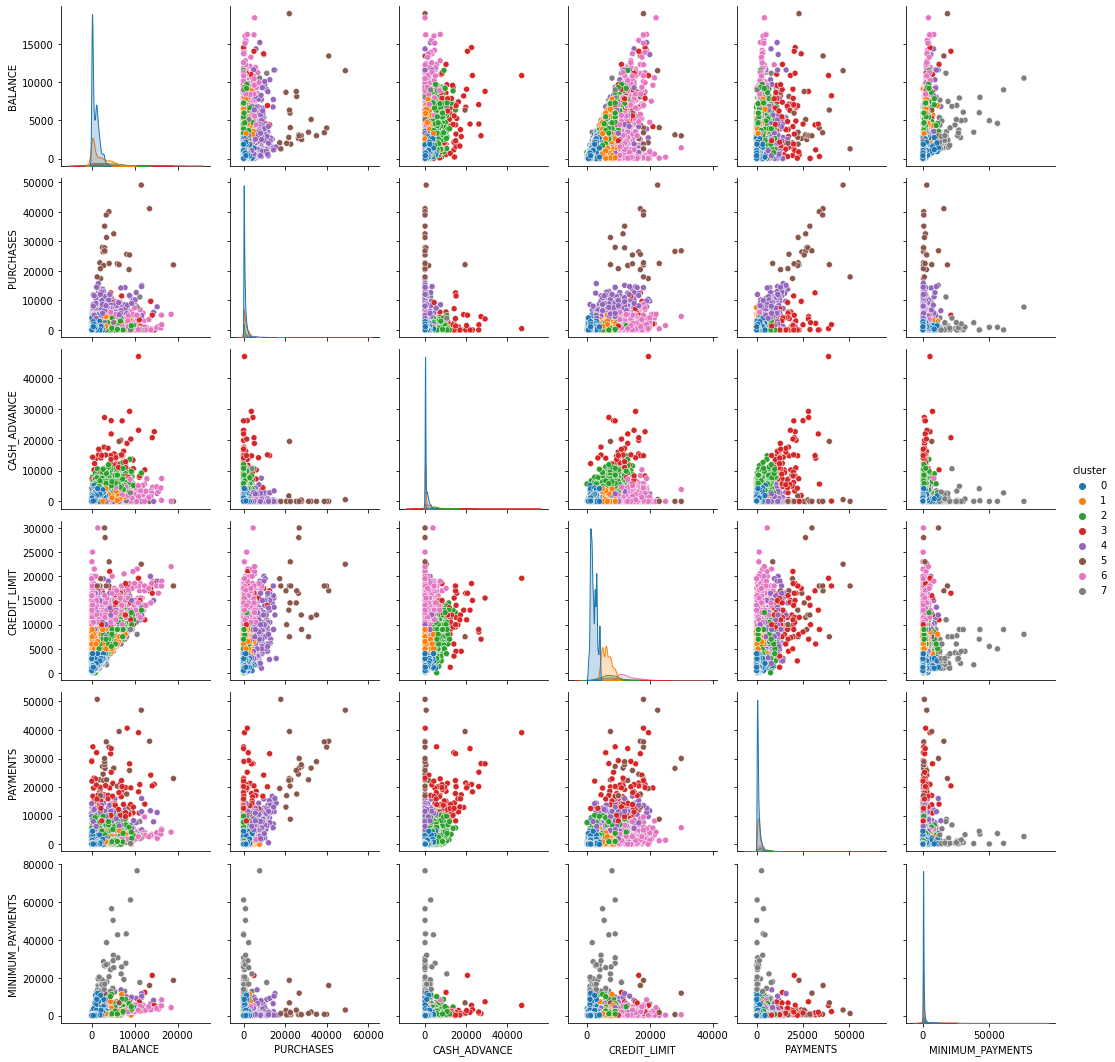

In [100]:
import seaborn as sns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster",palette="tab10")

The credit cardholders seem to segmented into 8 clusters in this way:

- Big Spenders with large Payments: they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.

- Cash Advances with large Payments : this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.

- Medium Spenders with third highest Payments :the second highest Purchases group (after the Big Spenders).

- Highest Credit Limit but Frugal :this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.

- Cash Advances with Small Payments : this group likes taking cash advances, but make only small payments.

- Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers.

- Smallest Spenders and Lowest Credit Limit - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

- Highest Min Payments : this group has the highest minimum payments (which presumably refers to "Min Payment Due" on the monthly statement. This might be a reflection of the fact that they have the second lowest Credit Limit of the groups, so it looks like the bank has identified them as higher risk.)